In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.tools as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [47]:
!pip install scikit-plot

# 1. Reading the Dataset

In [105]:
data=pd.read_excel("Telecom_Churn.xls")

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [107]:
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [108]:
data.drop(['Phone'],axis=1,inplace=True)
data.drop(['State'],axis=1,inplace=True)

# 2. Checking the Missing Values

In [101]:
data.isna().sum()
#there are no missing values

Account Length    0
VMail Message     0
Day Mins          0
Eve Mins          0
Night Mins        0
Intl Mins         0
CustServ Calls    0
Churn             0
Int'l Plan        0
VMail Plan        0
Day Calls         0
Day Charge        0
Eve Calls         0
Eve Charge        0
Night Calls       0
Night Charge      0
Intl Calls        0
Intl Charge       0
State             0
Area Code         0
Phone             0
dtype: int64

# 3. Checking the variables with one value

In [102]:
data.var()==0


Account Length    False
VMail Message     False
Day Mins          False
Eve Mins          False
Night Mins        False
Intl Mins         False
CustServ Calls    False
Churn             False
Int'l Plan        False
VMail Plan        False
Day Calls         False
Day Charge        False
Eve Calls         False
Eve Charge        False
Night Calls       False
Night Charge      False
Intl Calls        False
Intl Charge       False
Area Code         False
dtype: bool

In [103]:
data.nunique()


Account Length     212
VMail Message       46
Day Mins          1667
Eve Mins          1611
Night Mins        1591
Intl Mins          162
CustServ Calls      10
Churn                2
Int'l Plan           2
VMail Plan           2
Day Calls          119
Day Charge        1667
Eve Calls          123
Eve Charge        1440
Night Calls        120
Night Charge       933
Intl Calls          21
Intl Charge        162
State               51
Area Code            3
Phone             3333
dtype: int64

There are no variables having only one value

# 4. Checking the correlation of features

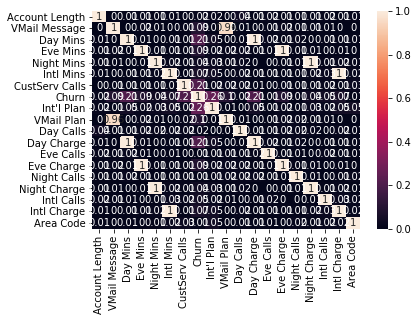

In [54]:
sns.heatmap(data.corr().abs().round(2),annot=True)

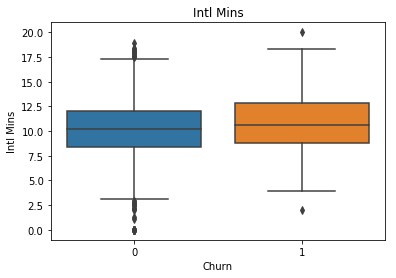

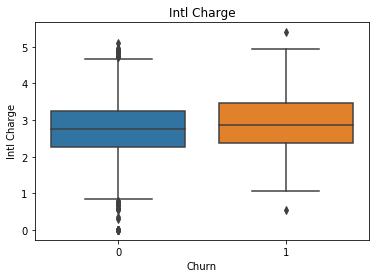

In [55]:
for i in ["Intl Mins","Intl Charge"]:
    sns.boxplot(data.Churn,data[i])
    plt.title(i)
    plt.show()

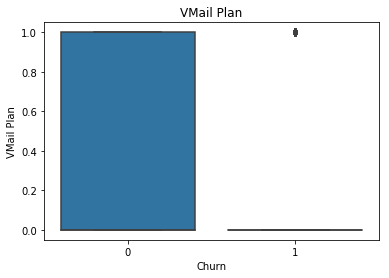

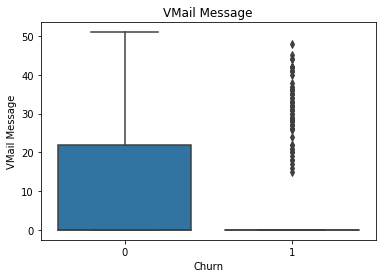

In [11]:
for i in ["VMail Plan","VMail Message"]:
    sns.boxplot(data.Churn,data[i])
    plt.title(i)
    plt.show()

In [109]:
data.drop(['Intl Mins','Eve Charge','Day Mins','VMail Message'],axis=1,inplace=True)

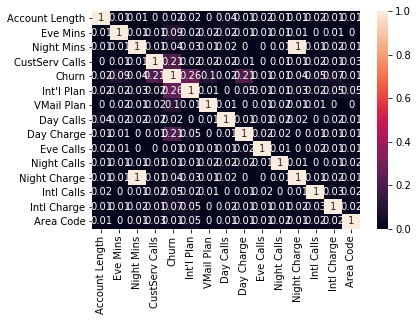

In [13]:
sns.heatmap(data.corr().abs().round(2),annot=True)

In [110]:
data.drop(['Night Charge'],axis=1,inplace=True)

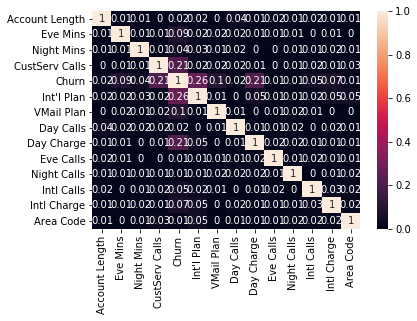

In [15]:
sns.heatmap(data.corr().abs().round(2),annot=True)

In [58]:
data=pd.get_dummies(data,drop_first=True)

In [17]:
data.head()

,Account Length,Eve Mins,Night Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,197.4,244.7,1,0,0,1,110,45.07,99,...,0,0,0,0,0,0,0,0,0,0
1,107,195.5,254.4,1,0,0,1,123,27.47,103,...,0,0,0,0,0,0,0,0,0,0
2,137,121.2,162.6,0,0,0,0,114,41.38,110,...,0,0,0,0,0,0,0,0,0,0
3,84,61.9,196.9,2,0,1,0,71,50.90,88,...,0,0,0,0,0,0,0,0,0,0
4,75,148.3,186.9,3,0,1,0,113,28.34,122,...,0,0,0,0,0,0,0,0,0,0


# 5. The Percentage of Churn in the Dataset

In [111]:
X=data.drop("Churn",axis=1)
Y=data.Churn

In [112]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [113]:
y_train.value_counts()/len(y_train)*100
#the percentage of churn is arround 86%

0    85.67427
1    14.32573
Name: Churn, dtype: float64

# 6. Developing the Decision Tree Model

In [114]:
tree=DecisionTreeClassifier(random_state=42)
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [115]:
print("Accuracy_Train:",tree.score(x_train,y_train)*100)
print("Accuracy_Test:",tree.score(x_test,y_test)*100)
print("ROC AUC Train:",roc_auc_score(y_train,tree.predict(x_train))*100)
print("ROC AUC Test:",roc_auc_score(y_test,tree.predict(x_test))*100)

Accuracy_Train: 100.0
Accuracy_Test: 92.20623501199042
ROC AUC Train: 100.0
ROC AUC Test: 85.20225669957686


In [116]:
gridsearch=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid={
                        "class_weight":[None,"balanced"],'max_depth':(5,10),
                        "min_samples_leaf":(25,150,10)
                    },cv=5,scoring="roc_auc",n_jobs=-1).fit(x_train,y_train)

In [118]:
gridsearch.best_params_

{'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 25}

In [119]:
gridsearch.best_score_

0.8882311258954295

We can oberve overfitting on this model because of the differences between train and test results.

In [120]:
tree_1=DecisionTreeClassifier(max_depth=5, 
                             min_samples_leaf=25,random_state=42)
tree_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [121]:
print("Accuracy_Train:",tree_1.score(x_train,y_train)*100)
print("Accuracy_Test:",tree_1.score(x_test,y_test)*100)
print("ROC AUC Train:",roc_auc_score(y_train,tree_1.predict(x_train))*100)
print("ROC AUC Test:",roc_auc_score(y_test,tree_1.predict(x_test))*100)

Accuracy_Train: 94.63785514205682
Accuracy_Test: 93.4052757793765
ROC AUC Train: 82.79696220896099
ROC AUC Test: 79.64739069111425


# 7. Calculating Sensitivity, Specificity, ROC AUC

In [122]:
print("Train:",classification_report(y_test,tree_1.predict(x_test)))

Train:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       709
           1       0.94      0.60      0.73       125

   micro avg       0.93      0.93      0.93       834
   macro avg       0.94      0.80      0.85       834
weighted avg       0.93      0.93      0.93       834



In [123]:
FPR,TPR,thresholds=roc_curve(y_test,tree_1.predict_proba(x_test)[:,1])


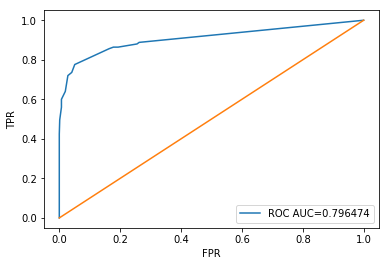

In [124]:
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,tree_1.predict(x_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

After experimenting wth several model version, I came down to this one, because of the accuracy and ROC AUC comparison both on the testing and training datasets difference is low, and secondly after oberving the senstivity results higher in comparison with model 1. 

# 8. Feature Importance 

In [125]:
feature_imp=pd.DataFrame(tree_1.feature_importances_,index=X.columns,columns=["Feature Importances"])
feature_imp.sort_values(by="Feature Importances",ascending=False)

,Feature Importances
Day Charge,0.318064
CustServ Calls,0.167586
Intl Charge,0.125377
Eve Mins,0.123282
Int'l Plan,0.100831
Intl Calls,0.088378
VMail Plan,0.064741
Night Calls,0.005626
Night Mins,0.005176
Day Calls,0.000939


Day Charge has the highest importance, i.e. 31.8% of total Gini reduction happened as a result of splits based on day charge. Considering the importance of the State result, I wll remove it.


# 9. Calculating Gain and Lift for or 10 equal deciles of customers

C:\Users\Arsen\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


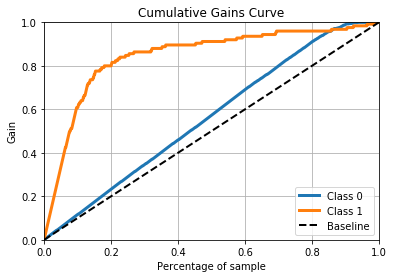

In [126]:
skplt.metrics.plot_cumulative_gain(y_test,tree_1.predict_proba(x_test))
#Cumulative Gains Cruve

C:\Users\Arsen\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


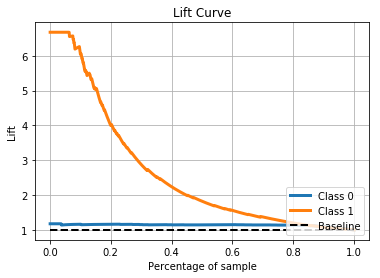

In [78]:
skplt.metrics.plot_lift_curve(y_test,tree_1.predict_proba(x_test))
#lift Curve

In [127]:
gn_lf=pd.DataFrame(tree_1.predict_proba(x_test)[:,1],columns=(["Y_Pred_Prob"]))

In [128]:
y_test = y_test.reset_index()
gn_lf["y_true"]=y_test.Churn
gn_lf.head()

,Y_Pred_Prob,y_true
0,0.02614,0
1,0.02614,0
2,1.00000,1
3,0.02614,0
4,0.02614,0


In [129]:
gn_lf=gn_lf.sort_values(by=['Y_Pred_Prob'],ascending=False)
gn_lf.head(20)

,Y_Pred_Prob,y_true
187,1.0,1
229,1.0,1
350,1.0,1
78,1.0,1
73,1.0,1
148,1.0,1
68,1.0,1
791,1.0,1
647,1.0,1
154,1.0,1


In [130]:
calc=pd.DataFrame(gn_lf.groupby(pd.qcut(gn_lf.Y_Pred_Prob,45, duplicates='drop'))['y_true'].sum()).sort_values(
    by=['Y_Pred_Prob'],ascending=False).reset_index()
calc

,Y_Pred_Prob,y_true
0,"(0.96, 1.0]",53
1,"(0.777, 0.96]",17
2,"(0.3704, 0.777]",5
3,"(0.3214, 0.3704]",15
4,"(0.16, 0.3214]",2
5,"(0.112, 0.16]",5
6,"(0.1119, 0.112]",10
7,"(0.1071, 0.1119]",1
8,"(0.03968, 0.1071]",0
9,"(0.02814, 0.03968]",3


In [131]:
obs=pd.DataFrame(gn_lf.groupby(pd.qcut(gn_lf.Y_Pred_Prob,45, duplicates='drop'))['y_true'].count()).sort_values(
    by=['Y_Pred_Prob'],ascending=False).reset_index()
obs

,Y_Pred_Prob,y_true
0,"(0.96, 1.0]",53
1,"(0.777, 0.96]",22
2,"(0.3704, 0.777]",5
3,"(0.3214, 0.3704]",30
4,"(0.16, 0.3214]",11
5,"(0.112, 0.16]",12
6,"(0.1119, 0.112]",90
7,"(0.1071, 0.1119]",11
8,"(0.03968, 0.1071]",11
9,"(0.02814, 0.03968]",52


In [132]:
calc["Total"]=obs.y_true
calc

,Y_Pred_Prob,y_true,Total
0,"(0.96, 1.0]",53,53
1,"(0.777, 0.96]",17,22
2,"(0.3704, 0.777]",5,5
3,"(0.3214, 0.3704]",15,30
4,"(0.16, 0.3214]",2,11
5,"(0.112, 0.16]",5,12
6,"(0.1119, 0.112]",10,90
7,"(0.1071, 0.1119]",1,11
8,"(0.03968, 0.1071]",0,11
9,"(0.02814, 0.03968]",3,52


In [133]:
calc["Percent"]=(calc.Total/len(y_test))*100


In [134]:
calc["Cum_Total"]=calc.Total.cumsum()
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total
0,"(0.96, 1.0]",53,53,6.354916,53
1,"(0.777, 0.96]",17,22,2.637890,75
2,"(0.3704, 0.777]",5,5,0.599520,80
3,"(0.3214, 0.3704]",15,30,3.597122,110
4,"(0.16, 0.3214]",2,11,1.318945,121
5,"(0.112, 0.16]",5,12,1.438849,133
6,"(0.1119, 0.112]",10,90,10.791367,223
7,"(0.1071, 0.1119]",1,11,1.318945,234
8,"(0.03968, 0.1071]",0,11,1.318945,245
9,"(0.02814, 0.03968]",3,52,6.235012,297


In [135]:
calc["Cum_Percent"]=calc.Percent.cumsum()
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total,Cum_Percent
0,"(0.96, 1.0]",53,53,6.354916,53,6.354916
1,"(0.777, 0.96]",17,22,2.637890,75,8.992806
2,"(0.3704, 0.777]",5,5,0.599520,80,9.592326
3,"(0.3214, 0.3704]",15,30,3.597122,110,13.189448
4,"(0.16, 0.3214]",2,11,1.318945,121,14.508393
5,"(0.112, 0.16]",5,12,1.438849,133,15.947242
6,"(0.1119, 0.112]",10,90,10.791367,223,26.738609
7,"(0.1071, 0.1119]",1,11,1.318945,234,28.057554
8,"(0.03968, 0.1071]",0,11,1.318945,245,29.376499
9,"(0.02814, 0.03968]",3,52,6.235012,297,35.611511


In [136]:
calc["Cum_y_true"]=calc.y_true.cumsum()
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total,Cum_Percent,Cum_y_true
0,"(0.96, 1.0]",53,53,6.354916,53,6.354916,53
1,"(0.777, 0.96]",17,22,2.637890,75,8.992806,70
2,"(0.3704, 0.777]",5,5,0.599520,80,9.592326,75
3,"(0.3214, 0.3704]",15,30,3.597122,110,13.189448,90
4,"(0.16, 0.3214]",2,11,1.318945,121,14.508393,92
5,"(0.112, 0.16]",5,12,1.438849,133,15.947242,97
6,"(0.1119, 0.112]",10,90,10.791367,223,26.738609,107
7,"(0.1071, 0.1119]",1,11,1.318945,234,28.057554,108
8,"(0.03968, 0.1071]",0,11,1.318945,245,29.376499,108
9,"(0.02814, 0.03968]",3,52,6.235012,297,35.611511,111


In [137]:
calc["Gain_Score"]=calc.Cum_y_true/calc.Cum_y_true.iloc[-1]*100
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total,Cum_Percent,Cum_y_true,Gain_Score
0,"(0.96, 1.0]",53,53,6.354916,53,6.354916,53,42.4
1,"(0.777, 0.96]",17,22,2.637890,75,8.992806,70,56.0
2,"(0.3704, 0.777]",5,5,0.599520,80,9.592326,75,60.0
3,"(0.3214, 0.3704]",15,30,3.597122,110,13.189448,90,72.0
4,"(0.16, 0.3214]",2,11,1.318945,121,14.508393,92,73.6
5,"(0.112, 0.16]",5,12,1.438849,133,15.947242,97,77.6
6,"(0.1119, 0.112]",10,90,10.791367,223,26.738609,107,85.6
7,"(0.1071, 0.1119]",1,11,1.318945,234,28.057554,108,86.4
8,"(0.03968, 0.1071]",0,11,1.318945,245,29.376499,108,86.4
9,"(0.02814, 0.03968]",3,52,6.235012,297,35.611511,111,88.8


In [138]:
calc["Lift_Score"]=(calc.Gain_Score/calc.Cum_Percent)
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total,Cum_Percent,Cum_y_true,Gain_Score,Lift_Score
0,"(0.96, 1.0]",53,53,6.354916,53,6.354916,53,42.4,6.672000
1,"(0.777, 0.96]",17,22,2.637890,75,8.992806,70,56.0,6.227200
2,"(0.3704, 0.777]",5,5,0.599520,80,9.592326,75,60.0,6.255000
3,"(0.3214, 0.3704]",15,30,3.597122,110,13.189448,90,72.0,5.458909
4,"(0.16, 0.3214]",2,11,1.318945,121,14.508393,92,73.6,5.072926
5,"(0.112, 0.16]",5,12,1.438849,133,15.947242,97,77.6,4.866045
6,"(0.1119, 0.112]",10,90,10.791367,223,26.738609,107,85.6,3.201363
7,"(0.1071, 0.1119]",1,11,1.318945,234,28.057554,108,86.4,3.079385
8,"(0.03968, 0.1071]",0,11,1.318945,245,29.376499,108,86.4,2.941127
9,"(0.02814, 0.03968]",3,52,6.235012,297,35.611511,111,88.8,2.493576


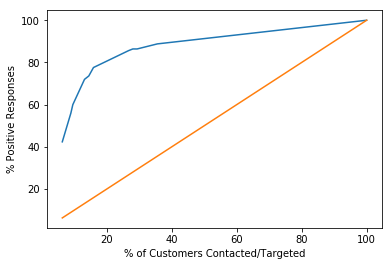

In [95]:
plt.plot(calc.Cum_Percent,calc.Gain_Score)
plt.plot(calc.Cum_Percent,calc.Cum_Percent)
plt.xlabel("% of Customers Contacted/Targeted")
plt.ylabel("% Positive Responses")
plt.show()

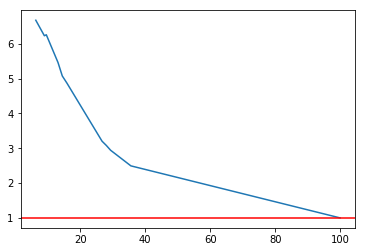

In [139]:
plt.plot(calc.Cum_Percent,calc.Lift_Score)
plt.axhline(y=1, color="red")
plt.show()